# Lab Exercise 6: Exploring the ERA5 Dataset

### Task 1: Exploring the dataset contents.

Let's start by investigating the dataset structure. Your dataset `era5_philippines_2009_09_27.nc` includes multiple variables with three primary dimensions (`valid_time`, `latitude`, and `longitude`).

1. Examine the Variables: Identify the variable names, their dimensions, and other details from the dataset output.
2. Research Variable Descriptions: Use the [ERA5 data documentation](https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation) to understand what each variable represents. 

Install the xarray and netCDF4 package (if not present)

```bash
!conda install -c conda-forge xarray netCDF4 --name meteo203 -y
```

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd


# Load the netCDF file
file_path = 'era5_philippines_2009_09_27.nc'
data = xr.open_dataset(file_path)

# Display dataset information
data

<xarray.Dataset> Size: 2MB
Dimensions:     (valid_time: 4, latitude: 121, longitude: 241)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 32B 2009-09-27 ... 2009-09-27T18:...
  * latitude    (latitude) float64 968B 30.0 29.75 29.5 29.25 ... 0.5 0.25 0.0
  * longitude   (longitude) float64 2kB 110.0 110.2 110.5 ... 169.5 169.8 170.0
    number      int64 8B ...
    expver      (valid_time) <U4 64B ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 467kB ...
    msl         (valid_time, latitude, longitude) float32 467kB ...
    u10         (valid_time, latitude, longitude) float32 467kB ...
    v10         (valid_time, latitude, longitude) float32 467kB ...
    tp          (valid_time, latitude, longitude) float32 467kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-18T18:39 GRIB to CDM+CF via cfgrib-0.9.1...

#### Questions

1. What are the primary dimensions (temporal, spatial) of this dataset?<br>
**The data appears to be 6 hourly data for the day 2009-09-27. The spatial dimensions is in latitude/longitude.**
2. How many elements are there for each dimension?<br>
**Each dimension has 5 elements.**
3. What do each of the variables represent? Hint: look for the keyword `GRIB Name`<br>
**The variables shown are: \
t2m - 2 metre temperature \
msl - Mean sea level pressure\
u10 - 10 metre U wind component\
v10 - 10 metre V wind component\
tp - Total precipitation**
5. How often is the data recorded?<br>
**The data is recorded every 6 hours.**
5. What is is the extent (`latitude`, `longitude`) of this dataset? Describe in terms of minimum and maximum latitude and longitude.<br>
**The latituide ranges from 0 to 30, while the longitude have values from 110 to 170.**

---

### Task 2: Slicing gridded data by index. 

The next step in our lab exercise is to calculate descriptive statistics and visualize the `t2m` (2-meter temperature) variable, which represents the air temperature close to the ground.

The structure of netCDF files is slightly different from HDF5 files, although both are commonly used for gridded scientific data. netCDF files, often used in atmospheric and climate sciences, are organized by dimensions, variables, and metadata:

1. Dimensions: These are the axes of the data (e.g., latitude, longitude, time). Each variable is defined over one or more dimensions.
2. Variables: These contain the actual data values. Each variable (like `t2m`) is associated with one or more dimensions.
3. Attributes: Metadata that describes each variable and the dataset as a whole.

In this task, we’ll perform basic statistics on `t2m` for a time slice and create a plot. This process includes calculating the mean, minimum, and maximum temperature over the dataset's time and spatial dimensions. 

We can easily [slice a subset of the data](https://www.w3schools.com/python/numpy/numpy_array_slicing.asp) as follows

```python
data[i, j ,k]
```

where `i`, `j`, and `k` are the index elements.


Consider the dimensions below for the subset `data['t2m']`
```python
(valid_time: 4, latitude: 121, longitude: 241)
```

We can take the ith time step, jth latitude, and kth longitude using the following 

```python
data['t2m'][i, j ,k]
```

In the code block below, access the `t2m` variable, and then slice according to i. Calculate the basic descriptive statistics (mean, min, max, median). Plot the data in a separate code block. 

We'll slice according to latitude and longitude in the next task.

In [2]:
i = 0

# Access the 't2m' variable for index i
t2m_slice = data['t2m'][i]
time =  data['valid_time'][i].values
time_str = pd.to_datetime(time).strftime('%Y-%m-%d %H:%M')

# Calculate descriptive statistics
mean_t2m = t2m_slice.mean()
min_t2m = t2m_slice.min()
max_t2m =  t2m_slice.max()

print(f"Mean 2m Temperature: {mean_t2m:.2f} K")
print(f"Min 2m Temperature: {min_t2m:.2f} K")
print(f"Max 2m Temperature: {max_t2m:.2f} K")

Mean 2m Temperature: 300.40 K
Min 2m Temperature: 288.45 K
Max 2m Temperature: 302.74 K


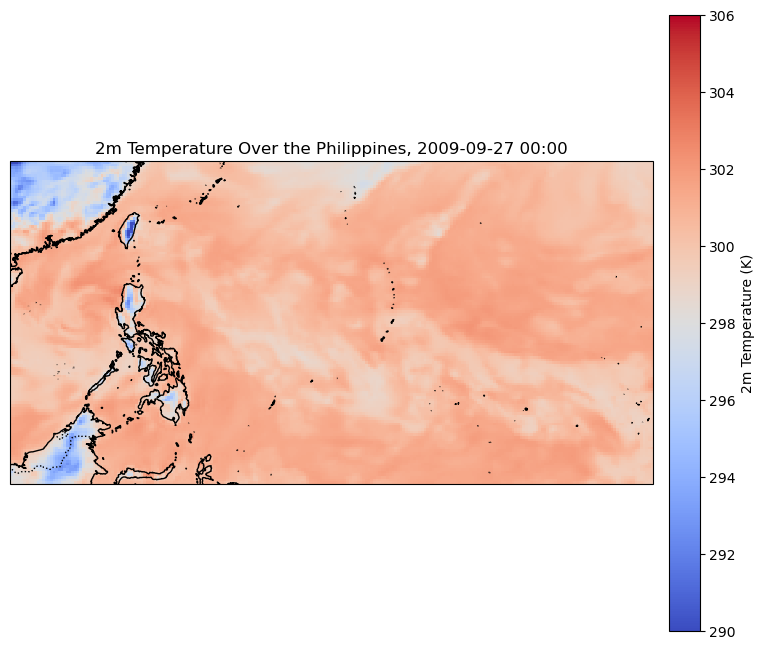

In [3]:
# plotting t2m_slice
# Set up the figure and map projection
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

#ax.set_extent([121.5, 122, 15.5, 16], crs=ccrs.PlateCarree()) 
# Add coastlines and gridlines
ax.coastlines(resolution="10m", linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the temperature data
temperature_plot = ax.pcolormesh(data['longitude'], data['latitude'], t2m_slice, 
                                 cmap='coolwarm', shading='auto', transform=ccrs.PlateCarree(),
                                 vmin=290, vmax=306)
plt.colorbar(temperature_plot, orientation='vertical', pad=0.02, label='2m Temperature (K)')
plt.title(f"2m Temperature Over the Philippines, {time_str}")

plt.show()

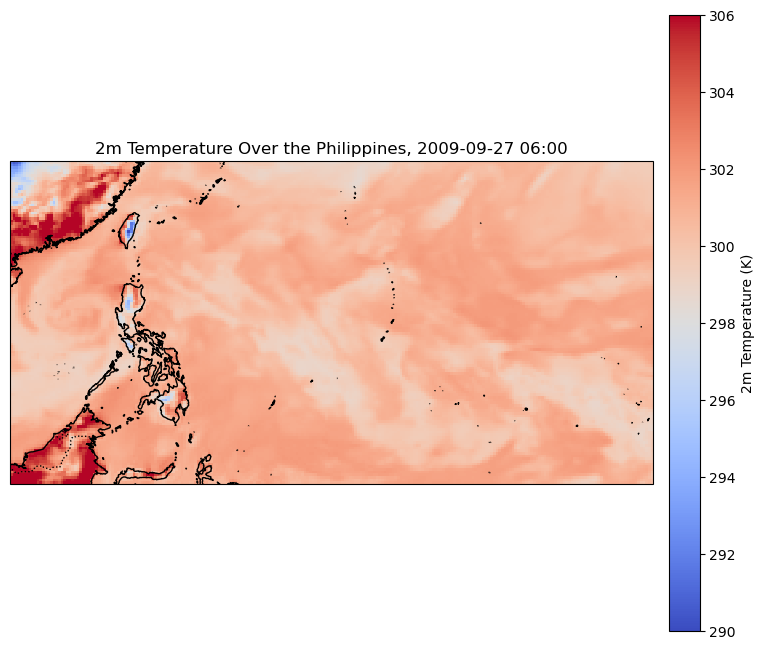

In [4]:
i = 1

# Access the 't2m' variable for index i
t2m_slice = data['t2m'][i]
time =  data['valid_time'][i].values
time_str = pd.to_datetime(time).strftime('%Y-%m-%d %H:%M')

# plotting t2m_slice
# Set up the figure and map projection
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

#ax.set_extent([116, 127, 5, 20], crs=ccrs.PlateCarree()) 
# Add coastlines and gridlines
ax.coastlines(resolution="10m", linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the temperature data
temperature_plot = ax.pcolormesh(data['longitude'], data['latitude'], t2m_slice, 
                                 cmap='coolwarm', shading='auto', transform=ccrs.PlateCarree(),
                                 vmin=290, vmax=306)
plt.colorbar(temperature_plot, orientation='vertical', pad=0.02, label='2m Temperature (K)')
plt.title(f"2m Temperature Over the Philippines, {time_str}")
plt.show()

#### Questions

1. What time does `i` represent? Why do we need `i` in `data['t2m'][i]`?<br>
**`i` represents the timestep of the data. Indicating `i` ensures that we are plotting only one timestep/slice.**
2. For the selected time slice and extend, what are the average, maximum, and minimum temperatures? <br>
**In the time slice `i = 0`, the statistics are given to be\
Mean 2m Temperature: 300.40 K\
Min 2m Temperature: 288.45 K\
Max 2m Temperature: 302.74 K**
4. How does the temperature vary across the given region? Where are the highest and lowest temperatures located? You can answer in terms of geography, or in terms of location (lon, lat).<br>
**The lower temperatures are usually on land, while warmer temperatures can be seen on the oceans.**
4. Duplicate the cell above, and then change `i` to a different value. Compare and contrast the two plots. What is a possible reason for the temperature difference between timesteps? What is the time difference between the time steps you are viewing?<br>
**At a different timestep (6-hour difference), the warmest temperatures are now on land. This is most likely caused by the diurnal cycle, and the heating of the land.**

---
### Task 3. Slicing gridded data by extent. 

Relying on the dimension order (`i`, `j`, `k`) can be confusing. xarray actually allows us to [slice along dimension names](https://docs.xarray.dev/en/latest/user-guide/indexing.html#indexing-with-dimension-names), especially if you know the dimensions of the dataset. 

For example, instead of specifying 

```python
data['t2m'][i]
```

to get the ith time step, we can select timesteps using the following:

```python
data['t2m'].sel(valid_time='2009-09-27 00:00')
```

We can also combine slicing across dimensions, and according to ranges. For example
```python
data['t2m'].sel(valid_time='2009-09-27 00:00', longitude=slice(111, 112), latitude=slice(21, 20))
```

If you forget the individual elements or variables, you can always display the dataset in a new code block so you can get the different variables and extents. 

For this task, define a new variable `data_ph` by slicing the first timestep of `data` and clipping the bounding box as close as you can to the Philippines by customizing the longitude and latitude. Afterwards, redo the `t2m` calculations and plots in Task 2. Create a new code block below, and don't forget to substitute your variables.  You can use the code snippet below to get you started.

```python
data_ph = data.sel(valid_time='2009-09-27 00:00', longitude=slice(111, 112), latitude=slice(21, 20))
t2m_ph = data_ph['t2m']
```

In [5]:
data_ph = data.sel(valid_time='2009-09-27 00:00:00', longitude=slice(116, 127), latitude=slice(20, 5))
t2m_ph = data_ph['t2m']

#[116, 127, 5, 20]

# Calculate descriptive statistics
mean_t2m_ph = t2m_ph.mean()
min_t2m_ph = t2m_ph.min()
max_t2m_ph =  t2m_ph.max()

print(f"Mean 2m Temperature: {mean_t2m_ph:.2f} K")
print(f"Min 2m Temperature: {min_t2m_ph:.2f} K")
print(f"Max 2m Temperature: {max_t2m_ph:.2f} K")

Mean 2m Temperature: 300.33 K
Min 2m Temperature: 292.38 K
Max 2m Temperature: 302.74 K


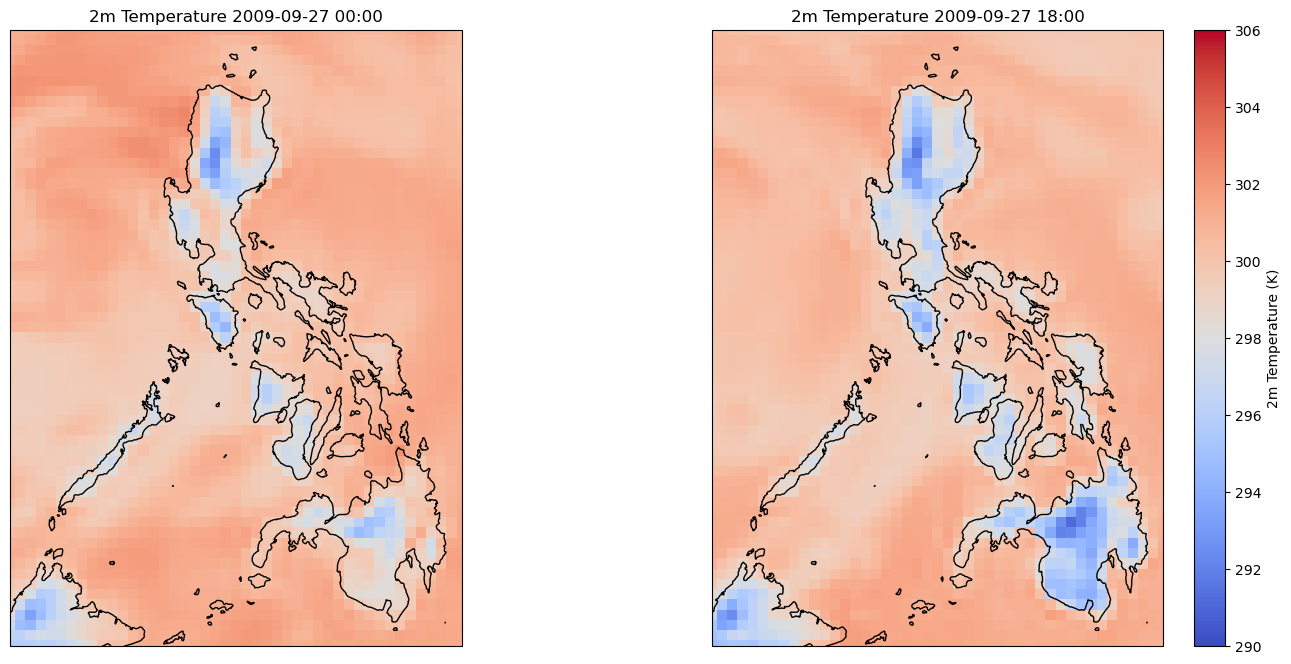

In [6]:
# Indices you want to plot
indices = [0, 3]

fig, axes = plt.subplots(1, 2, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})

for ax, i in zip(axes, indices):
    t2m_slice = data['t2m'][i]
    time = data['valid_time'][i].values
    time_str = pd.to_datetime(time).strftime('%Y-%m-%d %H:%M')

    ax.set_extent([116, 127, 5, 20], crs=ccrs.PlateCarree())
    ax.coastlines(resolution="10m", linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    temperature_plot = ax.pcolormesh(data['longitude'], data['latitude'], t2m_slice,
                                    cmap='coolwarm', shading='auto', transform=ccrs.PlateCarree(),
                                    vmin=290, vmax=306)
    ax.set_title(f"2m Temperature {time_str}")

# Add a single colorbar for both plots
cbar = fig.colorbar(temperature_plot, ax=axes, orientation='vertical', pad=0.02, label='2m Temperature (K)')
plt.show()

#### Questions

1. For the same timestep (`i=0` or `valid_time='2009-09-27 00:00`') compare the temperature statistics you calculated for sliced data (Task 3) and for the whole region (Task 2). Explain why the values are different. <br>
**The temperature difference (total - philippines) are as follows:\
Mean 2m Temperature: - 0.07 K\
Min 2m Temperature: + 3.93 K\
Max 2m Temperature: 0.00 K\
These temperature differences are caused by the omission of the many data that correspond to warm waters. This lowered the mean temperature. Since the northern lands that are colder are omitted, the minimum temperature also increased.**
3. Repeat the plots for either `i=3` or `valid_time='2009-09-27 12:00'` for the same latitude and longitude slices. Compare and contrast the different maps. What could be the reason for the difference in temperatures for the two timesteps?<br>
**The time at i = 3 have colder land temperatures. This is an indication of the diurnal cycle, where land is colder at night (18 UTC)**

---

### Task 4: Plotting `tp` (Total Precipitation)

Now that you’ve explored the `t2m` (2-meter temperature) variable, let’s try visualizing total precipitation (`tp`) over the Philippines. This exercise will test your ability to adapt code, interpret data, and customize plots as needed.

1. Adapt the Scripts Above: Modify the code from Task 3 to work with the `tp` variable instead of `t2m`. Make sure to:
    - Access the `tp` variable in the dataset.
    - Define your region of interest
    - Calculate descriptive statistics such as the mean, minimum, and maximum for `tp`.
    - Use two cells to plot two time slices of `tp` to show the spatial distribution of precipitation.
2. Customization
   - Adjust [color maps](https://matplotlib.org/stable/users/explain/colors/colormaps.html) as needed.
   - Update the title, color bar label, units
   - Don't forget to update vmin, vmax of `ax.pcolormesh` as needed
3. Hints:
   - Remember that `tp` represents total precipitation, so the units and values may differ significantly from temperature.
   - Use the [ERA5 data documentation](https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation) if you need clarification on the meaning of this variable.
   - Use as many cells as you can.

In [7]:
tp_ph = data_ph['tp'] * 1000

#[116, 127, 5, 20]

# Calculate descriptive statistics
mean_tp_ph = tp_ph.mean()
min_tp_ph = tp_ph.min()
max_tp_ph =  tp_ph.max()

print(f"Mean Total Precipetation: {mean_tp_ph:.2f} mm / 6 hrs")
print(f"Min Total Precipetation: {min_tp_ph:.2f} mm / 6 hrs")
print(f"Max Total Precipetation: {max_tp_ph:.2f} mm / 6 hrs")

Mean Total Precipetation: 0.96 mm / 6 hrs
Min Total Precipetation: 0.00 mm / 6 hrs
Max Total Precipetation: 12.16 mm / 6 hrs


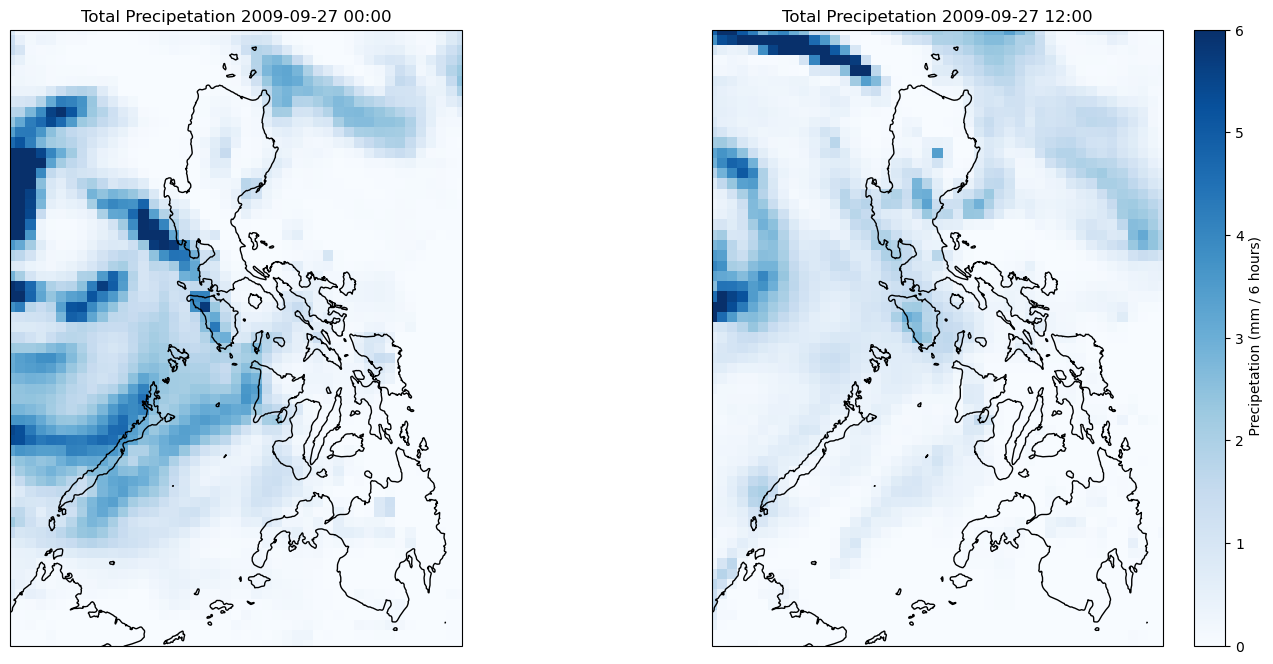

In [8]:
# Indices you want to plot
indices = [0, 2]

fig, axes = plt.subplots(1, 2, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})

for ax, i in zip(axes, indices):
    tp_slice = data['tp'][i] * 1000
    time = data['valid_time'][i].values
    time_str = pd.to_datetime(time).strftime('%Y-%m-%d %H:%M')

    ax.set_extent([116, 127, 5, 20], crs=ccrs.PlateCarree())
    ax.coastlines(resolution="10m", linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    temperature_plot = ax.pcolormesh(data['longitude'], data['latitude'], tp_slice,
                                    cmap='Blues', shading='auto', transform=ccrs.PlateCarree(),
                                    vmin=0, vmax=6)
    ax.set_title(f"Total Precipetation {time_str}")

# Add a single colorbar for both plots
cbar = fig.colorbar(temperature_plot, ax=axes, orientation='vertical', pad=0.02, label=' Precipetation (mm / 6 hours)')
plt.show()

#### Questions:
1. What are the mean, minimum, and maximum values for precipitation (`tp`) for your selected region?<br>
**For the region, the rainfall statistics are:\
Mean Total Precipetation: 0.64 mm / 6 hrs\
Min Total Precipetation: 0.00 mm / 6 hrs\
Max Total Precipetation: 8.53 mm / 6 hrs**
3. How does precipitation vary across the Philippines in this time slice?<br>
**The cluster of rainfall moves towards the left, suggesting that this rainfall event occured during a westward moving system (probably a typhoon).**
3. How does the distribution of `tp` differ from `t2m`?<br>
**The distribution is more localized for rainfall, compared to 2-meter temperature.**

---
### Task 5. Visualizing Wind Speed and Direction during a Tropical Cyclone

In this task, you will visualize the near-surface wind field associated with a tropical cyclone event (e.g., Tropical Storm Ondoy).
You’ll use the ERA5 variables `u10` and `v10`, which represent the zonal (east-west) and meridional (north-south) components of the 10-meter wind.

#### Steps
1. Open the dataset and extract the u10 and v10 variables.
2. Select a time index using isel(valid_time=ts) where ts can be 0, 1, 2, or 3.
3. Compute the wind speed magnitude as:
```python
uv = np.sqrt(u10_slice**2 + v10_slice**2)
```
5. Create a map plot showing:
    - The wind speed (uv) as a color field (using `pcolormesh`)
    - Wind barbs to indicate direction and strength (`plt.barbs`)
6. Repeat the plot for four consecutive timesteps (`ts = 0, 1, 2, 3`).

Initial scripts are provided below

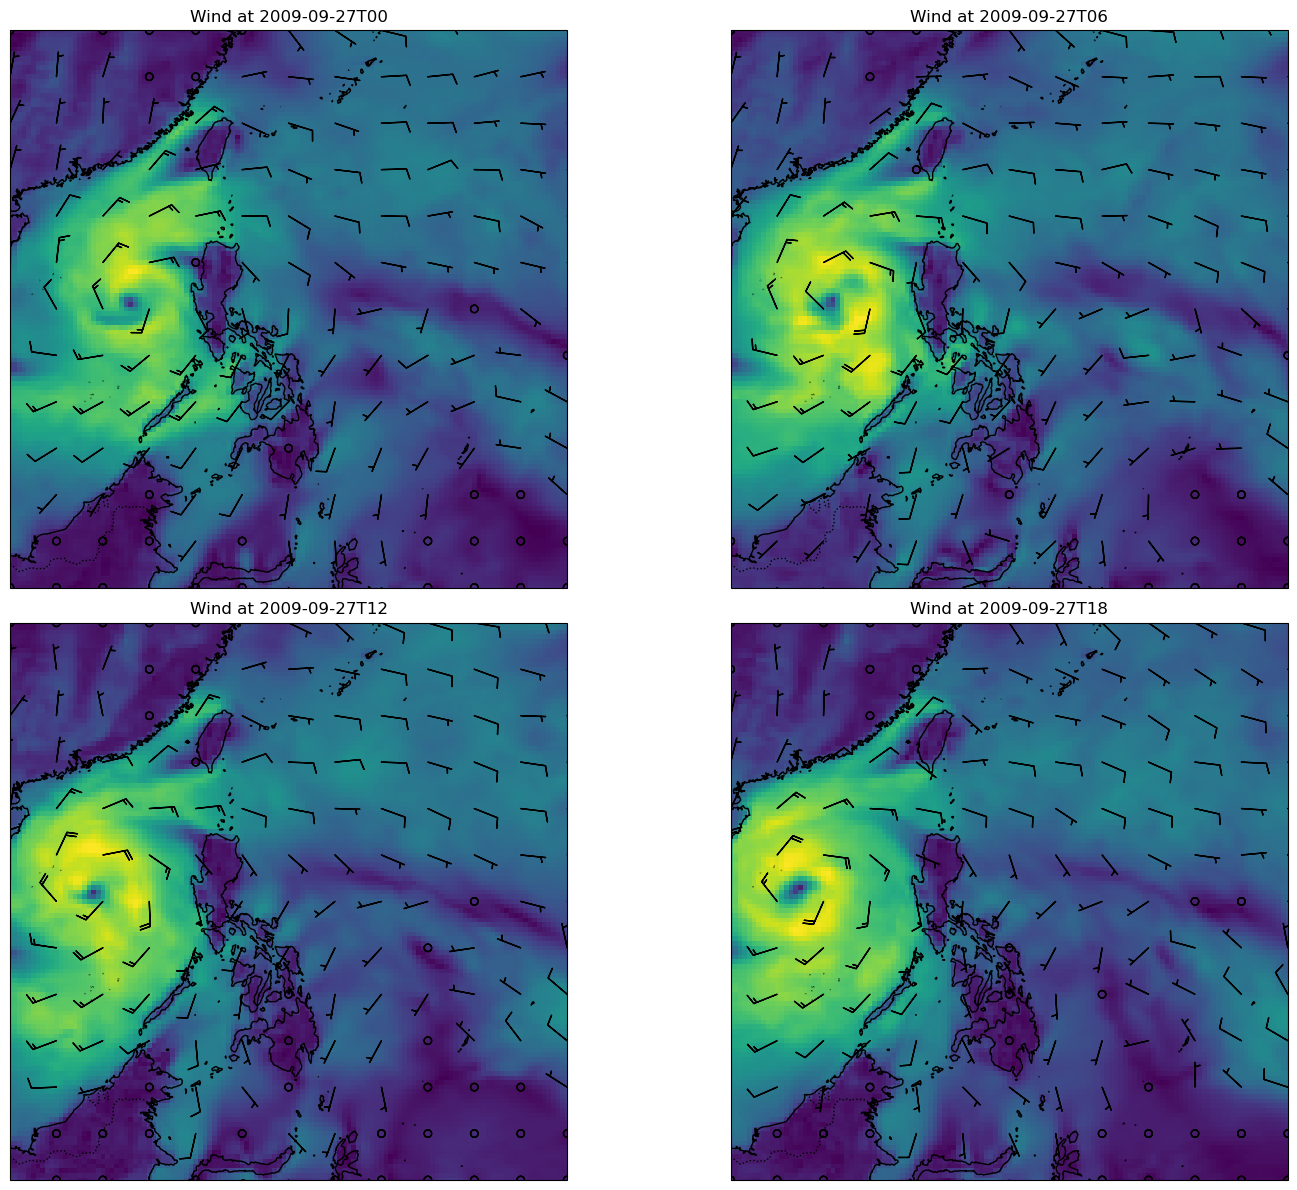

In [9]:
data = xr.open_dataset(file_path)

# Access the 'u10' and 'v10' variable
u10 = data['u10']
v10 = data['v10']


time_steps = [0, 1, 2, 3]  # four time indices to plot

fig, axes = plt.subplots(2, 2, figsize=(16, 12), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

for ax, ts in zip(axes, time_steps):
    u10_slice = u10.isel(valid_time=ts)
    v10_slice = v10.isel(valid_time=ts)
    uv = np.sqrt(u10_slice**2 + v10_slice**2)
    
    ax.set_extent([110, 140, 0, 30], crs=ccrs.PlateCarree())
    ax.coastlines(resolution="10m", linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot wind speed magnitude as colormesh
    mesh = ax.pcolormesh(data['longitude'], data['latitude'], uv, 
                         cmap='viridis', shading='auto', transform=ccrs.PlateCarree())
    
    # Plot wind direction barbs, downsampled for clarity
    ax.barbs(data['longitude'][::10], data['latitude'][::10], 
             u10_slice[::10, ::10].values, v10_slice[::10, ::10].values, 
             length=6, transform=ccrs.PlateCarree())
    
    # Add title with timestamp
    time_str = np.datetime_as_string(data['valid_time'][ts].values, unit='h')
    ax.set_title(f"Wind at {time_str}")

# Add a single colorbar for all subplots
#cbar = fig.colorbar(mesh, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
#cbar.set_label('Wind Speed (m/s)')

plt.tight_layout()
plt.show()

#### Questions

1. How does the wind field evolve as the tropical cyclone moves or intensifies?<br>
**The wind is circulating counter-clockwise, centered around a focal point that is moving towards the west.**
2. Where do the strongest winds occur, and how do they relate spatially to heaviest rainfall areas in Task 4?<br>
**The strongest wind occurs on the west Philippine sea, around the same area where the most of the rainfall was observed. The strongest winds propagate in the same direction as the rainfall.**
3. Can you identify the approximate storm center based on the wind direction pattern?<br>
**The storm center is approximately between two points of opposite wind directions. When travelling in a straight line through the storm, the point where wind direction flips is the likely center because the winds are converging.**

---

### Final Questions
1. What did you notice about the structure of the ERA5 NetCDF file in terms of its dimensions (time, latitude, longitude) and available variables?How do these dimensions relate to the physical meaning of the data?<br>
**The ERA5 NetCDF file is structured in such a way that a time can be a snapshot of the current conditions of variables in a frame of latitude and longitude.**
2. How did changing the timestep (valid_time) affect the spatial distribution of temperature, precipitation, and winds? What patterns or temporal variations stood out?<br>
**Changing the timestep showed a different slice of variables. Understandably so, precipitation and winds that are centralized in an area moved towards the west. For temperature, changing the time showed the diurnal changes that happen because of the sun setting.**
3. When you subset the data by location, what differences did you observe compared to the full domain? What does this tell you about the importance of spatial resolution and extent in interpreting atmospheric datasets?<br>
**Subsetting the data by location gives us a closer look at the spatial distribution of variables. This enables us to make generalizations and observations that are more accurate in specific locations, as the behavior of atmospheric variables vary greatly based on its geographical location.**
4. How are wind patterns related to precipitation and temperature fields in your plots?<br>
**Wind patterns, precipetation, and temperature fields have a close relationship, especially when looking at its distribution on the West Philippine sea, as these are all factors that are present and are changed with the traversal of a typhoon.**
5. What steps were needed to go from a raw NetCDF file to a meaningful scientific visualization?<br>
**Firstly, the file must be converted into something that is readable by our code, in this instance, and xarray. After isolating target regions/extents, units must be changed to match what is needed. After these processes are done can we only plot it into a visual output using a library, matplotlib in this instance.**
6. What challenges did you encounter, and how would you approach similar datasets in future analyses?<br>
**Choosing specific timesteps to compare introduced some difficulties, and I think being meticulous about the filtering and choosing specific case studies would help in more accurate observations.**